# HW1 Problem0 Sampling Distributions

- Plot the histogram of samples generated by a categorical distribution with probabilities [0.1,0.1,0.3,0.3,0.2]

In [1]:
from sampler import *
import matplotlib.pyplot as plt
import numpy as np

ap = np.array([0.1,0.1,0.3,0.3,0.2])
x = []
for i in range(10000):
    x.append(Categorical(ap).sample())
    
plt.hist(x, bins = len(ap), rwidth = 0.75, density = False)
plt.show()
plt.savefig('hw1Notsubmit/writeuplatex/plot1.png')

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

- Plot the univariate normal distribution with mean of 0 and standard deviation of 1.

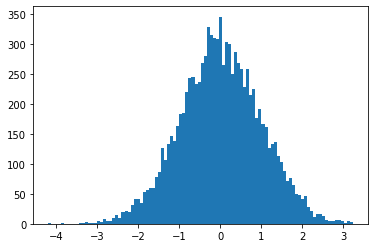

<Figure size 432x288 with 0 Axes>

In [2]:
mu = 0
sigma = 1

x = []
for i in range(10000):
    x.append(UnivariateNormal(mu,sigma).sample())
    
plt.hist( x, bins = 100, density = False)
plt.show()
plt.savefig('hw1Notsubmit/writeuplatex/plot2.png')

- Produce a scatter plot of the samples for a 2-D Gaussian with mean at [1,1] and covariance matrix [[1,0.5],[0.5,1]].

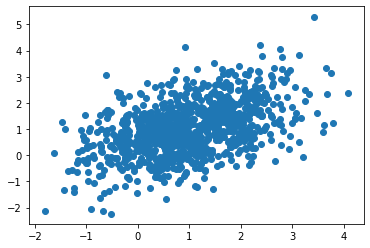

<Figure size 432x288 with 0 Axes>

In [3]:
Mu = np.array([[1],[1]])
Sigma = np.array([[1, 0.5], [0.5, 1]])

x = MultiVariateNormal(Mu, Sigma).sample()
for i in range(1000):
    x = np.hstack( ( x, MultiVariateNormal(Mu, Sigma).sample()))
    
plt.scatter( x[0,:],x[1,:])
plt.show()
plt.savefig('hw1Notsubmit/writeuplatex/plot3.png')

- Test your mixture sampling code by writing a function that implements an equal weighted mixture of four Gaussians in 2 dimensions, centered at ($\pm$1, $\pm$1) and having covariance $I$. Estimate the probability that a sample from this distribution lies within the unit circle centered at (0.1, 0.2) and include that number in your writeup.

In [4]:
ap = np.repeat(0.25, 4)
pm = ( [ np.array([[1],[1]]), np.array([ [1,0], [0,1] ] )],
       [ np.array([[-1],[1]]), np.array([ [1,0], [0,1] ] )],
       [ np.array([[1],[-1]]), np.array([ [1,0], [0,1]  ] )],
       [ np.array([[-1],[-1]]), np.array([ [1,0], [0,1]  ] )])

counts = 0

for i in range(10000):
    r = MixtureModel(ap,pm).sample()
    if (r[0]-0.1)**2 + (r[1]-0.2)**2 <= 1:
        counts += 1
        
print( 'probability is', counts/10000)

probability is 0.181
